1. Import các thư viện cần thiết:

In [ ]:
import pandas as pd
import numpy as np
!pip install underthesea
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 51.6 MB/s eta 0:00:00


2. Load và Tiền Xử Lý Dữ Liệu:

In [ ]:
# Đọc dữ liệu từ file hoặc nguồn dữ liệu khác
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/NMXLNNTN/data/sentimentVN.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head(5)

Mounted at /content/drive
(31460, 3)


,content,label,start
0,Áo bao đẹp ạ!,POS,5
1,Tuyệt vời,POS,5
2,2day ao khong giong trong,NEG,1
3,"Mùi thơm,bôi lên da mềm da",POS,5
4,"Vải đẹp, dày dặn",POS,5


In [ ]:
max = 10000
X = df['content'][:max].astype(str)
y = df['label'][:max]
for i in range(5):
    print(X[i],end='\t')
    print(y[i])

Áo bao đẹp ạ!	POS
Tuyệt vời	POS
2day ao khong giong trong	NEG
Mùi thơm,bôi lên da mềm da	POS
Vải đẹp, dày dặn	POS


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)
print(X_train.shape)
print(y_train.shape)

(7500,)
(7500,)


In [ ]:
# Biểu diễn văn bản bằng TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Biểu diễn văn bản bằng Bag of Words
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
# Mô hình Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)

# Mô hình Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_count, y_train)
lr_predictions = lr_model.predict(X_test_count)

# Mô hình Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)

# Mô hình Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_count, y_train)
svm_predictions = svm_model.predict(X_test_count)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Đánh giá và in kết quả
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

Naive Bayes Accuracy: 0.7332
Logistic Regression Accuracy: 0.7476
Random Forest Accuracy: 0.7584
SVM Accuracy: 0.7628


In [ ]:
# In báo cáo chi tiết
print("1. Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("2. Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("3. Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("4. SVM Classification Report:\n", classification_report(y_test, svm_predictions))

1. Naive Bayes Classification Report:
               precision    recall  f1-score   support

         NEG       0.66      0.53      0.59       483
         NEU       0.45      0.10      0.17       415
         POS       0.76      0.96      0.85      1602

    accuracy                           0.73      2500
   macro avg       0.62      0.53      0.53      2500
weighted avg       0.69      0.73      0.68      2500

2. Logistic Regression Classification Report:
               precision    recall  f1-score   support

         NEG       0.64      0.64      0.64       483
         NEU       0.37      0.27      0.31       415
         POS       0.84      0.90      0.87      1602

    accuracy                           0.75      2500
   macro avg       0.62      0.60      0.61      2500
weighted avg       0.73      0.75      0.73      2500

3. Random Forest Classification Report:
               precision    recall  f1-score   support

         NEG       0.63      0.68      0.66       483
  

In [ ]:
#Khai báo thư viện
!pip install seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

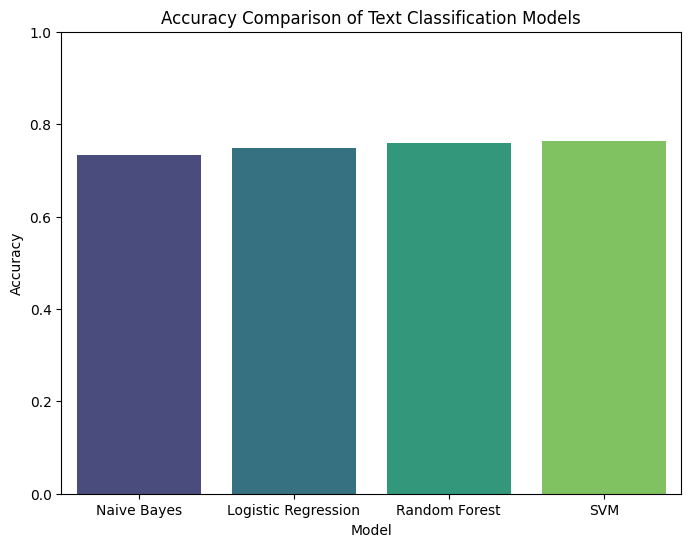

In [ ]:
# Kết quả của các mô hình
accuracy_scores = [accuracy_score(y_test, nb_predictions),
                   accuracy_score(y_test, lr_predictions),
                   accuracy_score(y_test, rf_predictions),
                   accuracy_score(y_test, svm_predictions)]
# Tên của các mô hình
model_names = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM']
# Biểu đồ so sánh
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores, hue=model_names, palette='viridis')
plt.title('Accuracy Comparison of Text Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()